# Ben Alton
# COMP 3800 - Data Analytics
# Project 1: Analyzing Trends in the 2016 General Election Dataset
##### Dataset Insights:
url - https://github.com/MEDSL/2018-elections-unoffical/blob/master/election-context-2018.csv
- This data set was  compiled by the MIT Election Data Science Lab and includes data from the 2012 and 2016 General Presidential elections as well as data from the 2014 General Representative elections for each county of each state in the contiguous U.S. It includes variables for total population, racial/ethnic composition of each county, age distribution, and polling totals for each candidate in the year's election race.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

election_df = pd.read_csv("2018-election-data.csv")
election_df
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

##### Problem Statements:
From this dataset, I intend to investigate the following questions:
- What relation (if any) is there between predominant voter race/ethnicity in a particular county and which candidate received the most votes for that county?
- Which states voted for which candidate in the 2016 General Presidential election? Which are "red" and which are "blue"?
- What (if any) is the correlation between median househhold income and voter preference?

In [2]:
#Data cleaning:
'''
For my analysis, I am only interested in columns containing data for presidential poll numbers in 2018,
ethnic percentage composition, voting age population, total population, and median household income.
'''
clean_elect_df = election_df.drop(columns = ['romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16', 'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14', 'age29andunder_pct', 'age65andolder_pct', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct', 'ruralurban_cc', 'female_pct', 'foreignborn_pct'])
clean_elect_df.dropna()

,state,county,fips,trump16,clinton16,otherpres16,total_population,cvap,white_pct,black_pct,hispanic_pct,nonwhite_pct,median_hh_inc
0,Alabama,Autauga,1001,18172,5936,865,55049.0,40690.0,75.683482,18.370906,2.572254,24.316518,53099.0
1,Alabama,Baldwin,1003,72883,18458,3874,199510.0,151770.0,83.178788,9.225603,4.366698,16.821212,51365.0
2,Alabama,Barbour,1005,5454,4871,144,26614.0,20375.0,45.885624,47.888329,4.309762,54.114376,33956.0
3,Alabama,Bibb,1007,6738,1874,207,22572.0,17590.0,74.765196,21.212121,2.223994,25.234804,39776.0
4,Alabama,Blount,1009,22859,2156,573,57704.0,42430.0,87.657701,1.557951,8.727298,12.342299,46212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,12154,3231,1745,44812.0,30565.0,79.815674,0.865840,15.859591,20.184326,68233.0
3110,Wyoming,Teton,56039,3921,7314,1392,22623.0,16335.0,81.200548,0.614419,15.174822,18.799452,75594.0
3111,Wyoming,Uinta,56041,6154,1202,1114,20893.0,14355.0,87.718375,0.186665,8.959939,12.281625,53323.0
3112,Wyoming,Washakie,56043,2911,532,371,8351.0,6135.0,82.397318,0.790325,13.962400,17.602682,46212.0


In [3]:
#Investigating problem #1:

predom_white = clean_elect_df[clean_elect_df['white_pct'] > 50] #find all counties where white population > 50%
predom_white_rep = predom_white[predom_white['trump16'] > predom_white['clinton16']] #find all predominantly white counties where votes for Trump are greater than votes for Clinton.
predom_white_dem = predom_white[predom_white['trump16'] < predom_white['clinton16']] #find all predominantly white counties where votes for Trump are less than votes for Clinton.

predom_black = clean_elect_df[clean_elect_df['black_pct'] > 50]
predom_black_rep = predom_black[predom_black['trump16'] > predom_black['clinton16']]
predom_black_dem = predom_black[predom_black['trump16'] < predom_black['clinton16']]

predom_hispanic = clean_elect_df[clean_elect_df['hispanic_pct'] > 50]
predom_hispanic_rep = predom_hispanic[predom_hispanic['trump16'] > predom_hispanic['clinton16']]
predom_hispanic_dem = predom_hispanic[predom_hispanic['trump16'] < predom_hispanic['clinton16']]

predom_nonwhite = clean_elect_df[clean_elect_df['nonwhite_pct'] > 50]
predom_nonwhite_rep = predom_nonwhite[predom_nonwhite['trump16'] > predom_nonwhite['clinton16']]
predom_nonwhite_dem = predom_nonwhite[predom_nonwhite['trump16'] < predom_nonwhite['clinton16']]

data = {
    'Republican': [predom_white_rep.size, predom_black_rep.size, predom_hispanic_rep.size, predom_nonwhite_rep.size],
    'Democrat': [predom_white_dem.size, predom_black_dem.size, predom_hispanic_dem.size, predom_nonwhite_dem.size],
    'Total': [predom_white.size, predom_black.size, predom_hispanic.size, predom_nonwhite.size]
}
results_df = pd.DataFrame(data, index = ['Predominantly White', 'Predominantly Black', 'Predominantly Hispanic', 'Predominantly Non-white'])
results_df

,Republican,Democrat,Total
Predominantly White,32604,3263,35867
Predominantly Black,39,1183,1222
Predominantly Hispanic,715,533,1248
Predominantly Non-white,1495,3081,4576


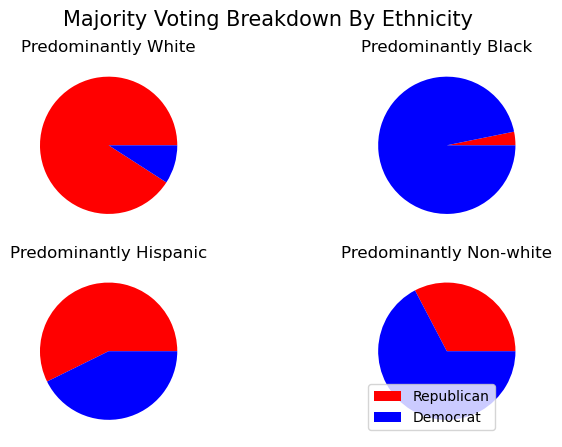

,Republican,Democrat,Total
Predominantly White,32604,3263,35867
Predominantly Black,39,1183,1222
Predominantly Hispanic,715,533,1248
Predominantly Non-white,1495,3081,4576


In [4]:
fig, axes = plt.subplots(2,2)
colors = ['r', 'b']

axes[0,0].pie(results_df.iloc[0, :2], colors = colors)
axes[0,0].set_title("Predominantly White")

axes[0,1].pie(results_df.iloc[1, :2], colors = colors)
axes[0,1].set_title("Predominantly Black")

axes[1,0].pie(results_df.iloc[2, :2], colors = colors)
axes[1,0].set_title("Predominantly Hispanic")

axes[1,1].pie(results_df.iloc[3, :2], colors = colors)
axes[1,1].set_title("Predominantly Non-white")

plt.legend(results_df.columns[:2])
fig.set_figwidth(8)
fig.suptitle("Majority Voting Breakdown By Ethnicity", size = 15)
plt.show()
results_df

##### Interpretation of findings for problem #1:

The pie charts shown above display the findings of my analysis to answer question #1. The data backing the pie charts is also shown for reference.

- In communities where the population was predominantly white, or where more than 50% of the population was white, the Republican candidate received most of the votes.
- In communities where the population was predominantly black, the Democrat candidate won a strong majority of the votes.
- Predominantly Hispanic communities were less extreme than either predominantly black or predominantly white communities, but a majority still favored the Republican candidate.
- Finally, in predominantly non-white communities, poll numbers were again less extreme; however, the Democrat candidate received a strong majority of votes.

In [5]:
#Investigating problem #2:

states_df = clean_elect_df.groupby(['state']).sum()
states_df['difference'] = (states_df['trump16'] - states_df['clinton16'])
states_df.sort_values(['difference'], inplace = True)
clean_states = states_df[['trump16', 'clinton16', 'difference']]

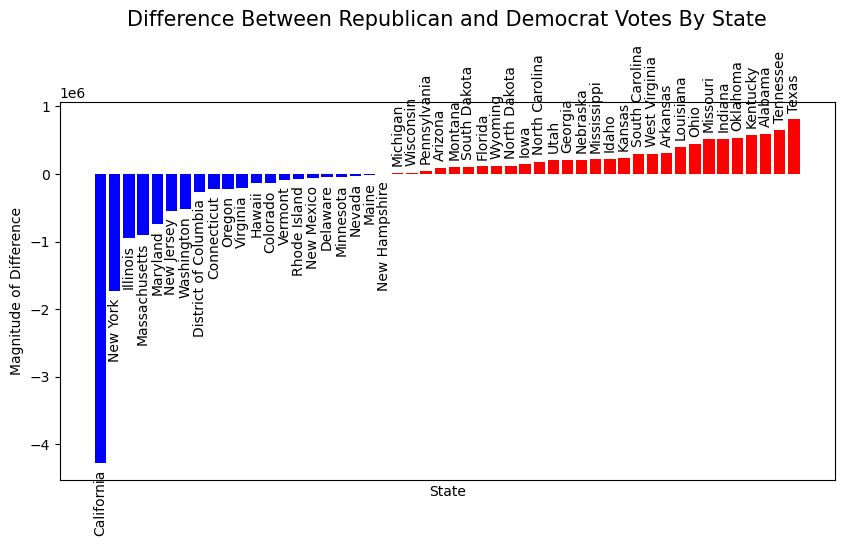

                      trump16  clinton16  difference
state                                               
California            4483810    8753788    -4269978
New York              2814589    4547562    -1732973
Illinois              2146015    3090729     -944714
Massachusetts         1090893    1995196     -904303
Maryland               943169    1677928     -734759
New Jersey            1601933    2148278     -546345
Washington            1221747    1742718     -520971
District of Columbia    12723     282830     -270107
Connecticut            673215     897572     -224357
Oregon                 782403    1002106     -219703
Virginia              1769443    1981473     -212030
Hawaii                 128847     266891     -138044
Colorado              1202484    1338870     -136386
Vermont                 95369     178573      -83204
Rhode Island           180490     251888      -71398
New Mexico             319667     385234      -65567
Delaware               185127     235603      

In [6]:
states = clean_states.index
colors = [('r' if state > 0 else 'b') for state in clean_states.iloc[:, 2]]
xpos = np.arange(len(states))

fig, ax = plt.subplots()
bars = ax.bar(xpos + 5, clean_states.iloc[:, 2], color = colors, label = clean_states.iloc[:, 0], align = 'edge')
ax.set_xlabel("State")
ax.set_ylabel("Magnitude of Difference")
ax.bar_label(bars, labels = states, rotation = 90, padding = 5)
ax.set_xticks([])
ax.set_title("Difference Between Republican and Democrat Votes By State", pad = 55, size = 15)
plt.show()
print(clean_states)

##### Interpretation of findings for problem #2:
The above bar chart shows the magnitude of difference between the number of votes for the major Republican candidate (Trump) and the major Democrat candidate (Clinton). Greater displacement from zero indicates a stronger Democrat or Republican voting trend, while a difference closer to 0 indicates mixed polling numbers.
- There are 21 states with a predominantly Democrat voting population. The top three strongest Democrat-voting states are (in order): Californina, New York, and Illinois. Polling in New Hampshire was very mixed; however, there were still more votes for the Clinton than Trump by a margin of around 2,000 votes.
- The remaining 29 states had a predominantly Republican voting population. The top three strongest Republican-voting states are (in order): Texas, Tennessee, and Alabama.

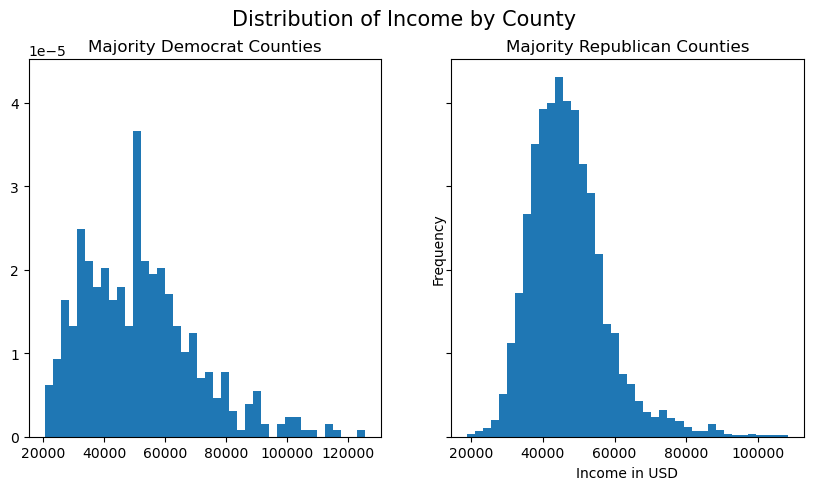

num. of dem. majority counties: 488 
num. of rep. majority: 2623
dem. majority mean income: 51431.5 
rep. majority mean income: 47145.2920320244


In [7]:
#Investigating problem #3:

income_df = clean_elect_df[['state', 'county', 'trump16', 'clinton16', 'median_hh_inc' ]]
rep_majority_counties = income_df[income_df['trump16'] > income_df['clinton16']]
dem_majority_counties = income_df[income_df['trump16'] < income_df['clinton16']]

fig, ax = plt.subplots(1,2, sharey = True)
rep_maj_income = rep_majority_counties.loc[:, 'median_hh_inc'].dropna()
dem_maj_income = dem_majority_counties.loc[:, 'median_hh_inc'].dropna()
ax[0].hist(dem_maj_income, bins = 40, density = True)
ax[0].set_title('Majority Democrat Counties')
ax[1].hist(rep_maj_income, bins = 40, density = True)
ax[1].set_title('Majority Republican Counties')
plt.xlabel('Income in USD')
plt.ylabel('Frequency')
fig.suptitle("Distribution of Income by County", size = 15)

plt.show()
print("num. of dem. majority counties:", len(dem_maj_income), "\nnum. of rep. majority:", len(rep_maj_income))
print("dem. majority mean income:", dem_maj_income.to_numpy().mean(), "\nrep. majority mean income:", rep_maj_income.to_numpy().mean())

##### Interpreting the findings for problem #3:
The two histograms above show the distribution of median incomes in counties that were majority Democrat and majority Republican. While the number of majority Democrat counties is significantly less than the number of majority Republican counties, the shapes still provide useful information.
- The mean income for the majority Democrat counties is 51,431.50.
- The mean income for the majority Republican counties is 47,145.29.
- The mean income for the majority Democrat counties was in the 20K-80K range, while the mean income for the majority Republican counties was most concentrated in the 35K-60K range.
- In both cases, the distribution of incomes is skewed right.

## Summary of Findings

##### Main findings for question 1:
- An analysis of the data set revealed that predominantly white, black, hispanic, and non-white communities tend to vote Republican, Democrat, Republican, and Democrat respectively. White and black communities were more extreme in their voting preference, while the hispanic and non-white communities produced more moderately mixed polling numbers.

##### Main findings for question 2:
- Interpreting the data to show how each state voted overall shed some light on a few key facts. First, the top two majority-Democrat states produced strong polling results, higher than the top two majority-Republican states by an order of magnitude. Second, while the voting sentiment was stronger in the majority Democrat states, the number of majority Republican states (and the votes they represent) was sufficient to elect the Republican candidate to office.
- One issue with this analysis is that it does not account for higher voting populations in certain states relative to others. For example, California, Illinois, and Texas all have large populations and as a side effect are also the three states with the strongest voter sentiment.

##### Main findings for question 3:
- A investigation into a potential correlation between median household income for a particular county and voter preference yielded some interesting results. For both majority Democrat and majority Republican counties, the distribution of incomes was skewed right, with the average being just over 51,000 for majority Democrat counties and just over 47,000 for majority Republican counties. The concentration of incomes for majority Republican counties tended toward the center, while the majority Democrat counties were more-loosely concentrated.
- After completing this analysis, it does not appear that median household income has any bearing on overall voter preference for any given county.

##### Future research directions:
- In further exploration of this dataset, I would be curious to find a way to account for total population when finding overall voter sentiment for a given state. I think it would also be worthwhile to explore if there exists any correlation between education level, age composition, unemployment, and voter sentiment.